In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pandas as pd
import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

#from matplotlib import reload
import arrow
import gsw
import time

%matplotlib inline

plt.rcParams.update({'font.size': 20,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20})



In [2]:
13/35

0.37142857142857144

    namelist_smelt_ref :

    !>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    !'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
    &nampisext     !   air-sea exchange
    !,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
       ln_co2int  =  .false. ! read atm pco2 from a file (T) or calculate (F)
       clname     =  'atcco2.txt'  ! Name of atm pCO2 file - ln_co2int = T
       zz_carbon_year =  -999     ! model year for calculating co2 < 0, use model year
       zz_LR_slope   =  2.149     !  linear regression + gaussian fit
       zz_LR_int     =  -3929.359 !  to seasonal cycle of atmospheric co2
       zz_ctr        =  161.898   !  based on scripps observations at ptbarrow and lajolla
       zz_amp        =  7.083     !  calc notebook by TJSJ
       zz_wid        =  44.703    !  notebook loc:
       zz_ctr2       =  218.832   !  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
       zz_amp2       =  -19.004   !
       zz_wid2       =  87.8836   !
       zz_ctr3       =  199.430   !
       zz_amp3       =  8.026     !
       zz_wid3       =  -185.920  !
    /
    !'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
    
    
    from p4zflx.f90:

      IF( zz_carbon_year .lt. 0) THEN
         zz_year = nyear
      ELSE
         zz_year = zz_carbon_year
      ENDIF
      zz_day = nday_year

      zz_yearcyc =  zz_amp * exp( -((zz_day - zz_ctr)/zz_wid)**2)&
              + zz_amp2 * exp( -((zz_day - zz_ctr2)/zz_wid2)**2)&
              + zz_amp3 * exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

      zz_atcco2 = (zz_year+(zz_day/365))*zz_LR_slope+zz_LR_int + zz_yearcyc

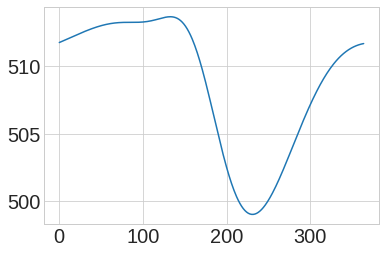

In [9]:
zz_LR_slope   =  0     # linear regression + gaussian fit
zz_LR_int     =  509.24 # to seasonal cycle of atmospheric co2
zz_ctr        =  161.898   # based on scripps observations at ptbarrow and lajolla
zz_amp        =  7.083     # calc notebook by TJSJ
zz_wid        =  44.703    # notebook loc:
zz_ctr2       =  218.832   # carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
zz_amp2       =  -19.004   #
zz_wid2       =  87.8836   #
zz_ctr3       =  199.430   #
zz_amp3       =  8.026     #
zz_wid3       =  -185.920  #

zz_year = 2015
zz_day = 1

zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

zz_atcco2 = (zz_year+(zz_day/365))*zz_LR_slope+zz_LR_int + zz_yearcyc


atcco2_ar = np.zeros(365)

for i in range(0,365):
    zz_day = i
    
    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)
    
    atcco2_ar[i] = (zz_year+(zz_day/365))*zz_LR_slope+zz_LR_int + zz_yearcyc
plt.plot(atcco2_ar)